In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy import wcs
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from scipy.stats import gaussian_kde

In [3]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [4]:
f = fits.open('/Volumes/Samsung_T5/photRun0520/PISCES-II_f606w/final_drcF606W.fits')
w = wcs.WCS(f[1].header)

In [5]:
catPsc = np.genfromtxt('/Volumes/Samsung_T5/photRun0520/drcPhot29Apr/catDir_PISCES-II/PISCES-II_fullCat.dat',
                    names=True)

In [6]:
good = np.logical_and(np.logical_and(catPsc['magr_f606w']<=30,catPsc['magr_f606w']-catPsc['magr_f814w']<=0),
                      np.logical_or(catPsc['six_4_flag_f606w'] == 1,
                       catPsc['six_4_flag_f814w'] == 1))

In [7]:
xgood = catPsc['xcenter_f606w'][good]
ygood = catPsc['ycenter_f606w'][good]

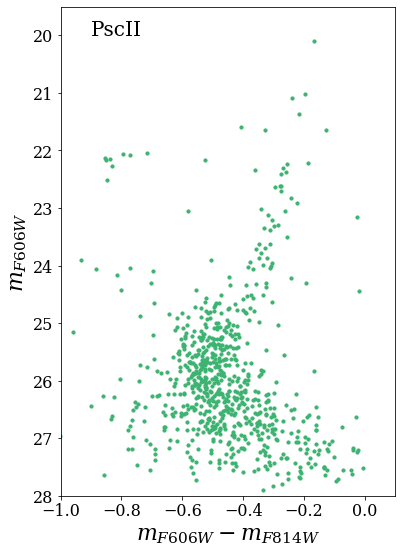

In [8]:
fig,ax = plt.subplots(figsize=(6,9))

ax.scatter(catPsc['magr_f606w'][good]-catPsc['magr_f814w'][good],
           catPsc['magr_f606w'][good],s=10,color='mediumseagreen')
# ax.hlines(22,-2,0.1)
# ax.hlines(24,-2,0.1)

ax.set_ylim(28,19.5)
ax.set_xlim(-1.,0.1)

ax.set_xlabel(r'$m_{F606W}-m_{F814W}$',fontsize=22)
ax.set_ylabel(r'$m_{F606W}$',fontsize=22)
ax.tick_params(axis='both', labelsize=16)
ax.text(-0.9,20,'PscII',fontsize=20)

# plt.savefig('figures/psc2cmd.png',bbox_inches='tight',dpi=660)
plt.show()

In [9]:
orientat = -116.9984711105008

In [10]:
theta = np.deg2rad(orientat)
c,s = np.cos(theta), np.sin(theta)

In [11]:
coords = np.vstack((xgood,ygood))

In [12]:
# Go from RA,DEC to Pixel
# c2 = np.vstack((344.6345,5.9526))
# test2 = w.wcs_world2pix(c2.T,0)
# print(test2[0])

In [13]:
def rd2xy(ra,dec):
    c2 = np.vstack((ra,dec))
    test2 = w.wcs_world2pix(c2.T,0)
    
    print(test2[0])
    
    return test2[0]

In [14]:
x0 = 2307.03736948
y0 = 2458.32297505

In [15]:
xT = c*(xgood-x0) - s*(ygood-(y0)) + x0
yT = s*(xgood-x0) + c*(ygood-(y0)) + (y0)

In [16]:
xgood = xT
ygood = yT

In [17]:
xy = np.vstack([xgood,ygood])
z = gaussian_kde(xy)(xy)

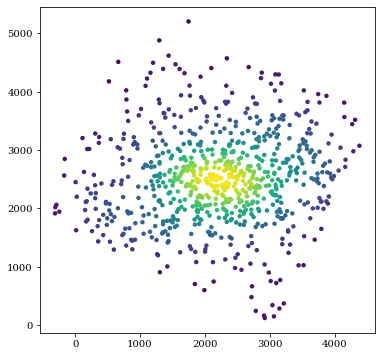

In [18]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(xgood, ygood, c=z, s=20, edgecolor='')
# ax.plot(0,0,color='red',ms=10,marker='*')

# hor_x0 = 2149
# hor_y0 = 2372
plt.show()


In [19]:
sand = rd2xy(344.6341667,5.9545278)

[2169.7262926  2408.23942194]


In [20]:
sand2 = rd2xy(344.6347083,5.9549167)

[2162.38431179 2360.96998135]


In [21]:
munoz = rd2xy(344.6345,5.9526)

[2304.23622908 2449.98448847]


In [22]:
belokurov = rd2xy(344.6291667,5.9525000)

[2137.26591556 2793.55557544]


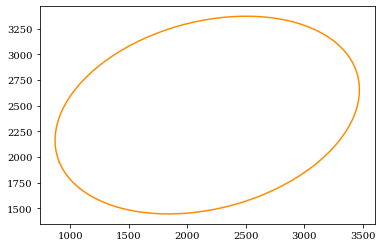

In [23]:
u = sand[0]
v = sand[1]
herc_ext = 1.12/60 # degrees
herc_ext_pix = herc_ext*(3600/0.05)
a = herc_ext_pix
ell = 0.33
b = a*(1-ell)
t_rot = np.deg2rad(110+90)

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
    
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'darkorange' ) 
plt.show()

In [24]:
u2 = 2260
v2 = 2470
herc_ext = 1.26/60 # degrees
herc_ext_pix = herc_ext*(3600/0.05)
a = herc_ext_pix
ell = 0.39
b = a*(1-ell)
t_rot = np.deg2rad(103+90)

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot2 = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot2[:,i] = np.dot(R_rot,Ell[:,i])
    
# plt.plot( u+Ell_rot2[0,:] , v+Ell_rot2[1,:],'darkorange' ) 
# plt.show()

In [25]:
u3 = munoz[0]
v3 = munoz[1]
herc_ext = 1.12/60 # degrees
herc_ext_pix = herc_ext*(3600/0.05)
a = herc_ext_pix
ell = 0.34
b = a*(1-ell)
t_rot = np.deg2rad(78+90)

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot3 = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot3[:,i] = np.dot(R_rot,Ell[:,i])
    
# plt.plot( u+Ell_rot2[0,:] , v+Ell_rot2[1,:],'darkorange' ) 
# plt.show()

In [26]:
u4 = sand2[0]
v4 = sand2[1]
herc_ext = 1.09/60 # degrees
herc_ext_pix = herc_ext*(3600/0.05)
a = herc_ext_pix
ell = 0.28
b = a*(1-ell)
t_rot = np.deg2rad(107+90)

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot4 = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot4[:,i] = np.dot(R_rot,Ell[:,i])


In [27]:
u5 = 2248
v5 = 2473
herc_ext = 1.21/60 # degrees
herc_ext_pix = herc_ext*(3600/0.05)
a = herc_ext_pix
ell = 0.39
b = a*(1-ell)
t_rot = np.deg2rad(102+90)

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot5 = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot5[:,i] = np.dot(R_rot,Ell[:,i])


In [28]:
u6 = munoz[0]
v6 = munoz[1]
herc_ext = 1.18/60 # degrees
herc_ext_pix = herc_ext*(3600/0.05)
a = herc_ext_pix
ell = 0.39
b = a*(1-ell)
t_rot = np.deg2rad(98+90)

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot6 = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot6[:,i] = np.dot(R_rot,Ell[:,i])
    
# plt.plot( u+Ell_rot2[0,:] , v+Ell_rot2[1,:],'darkorange' ) 
# plt.show()

In [29]:
u7 = belokurov[0]
v7 = belokurov[1]
herc_ext = 1.1/60 # degrees
herc_ext_pix = herc_ext*(3600/0.05)
a = herc_ext_pix
ell = 0.4
b = a*(1-ell)
t_rot = np.deg2rad(77+90)

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot7 = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot7[:,i] = np.dot(R_rot,Ell[:,i])
    
# plt.plot( u+Ell_rot2[0,:] , v+Ell_rot2[1,:],'darkorange' ) 
# plt.show()

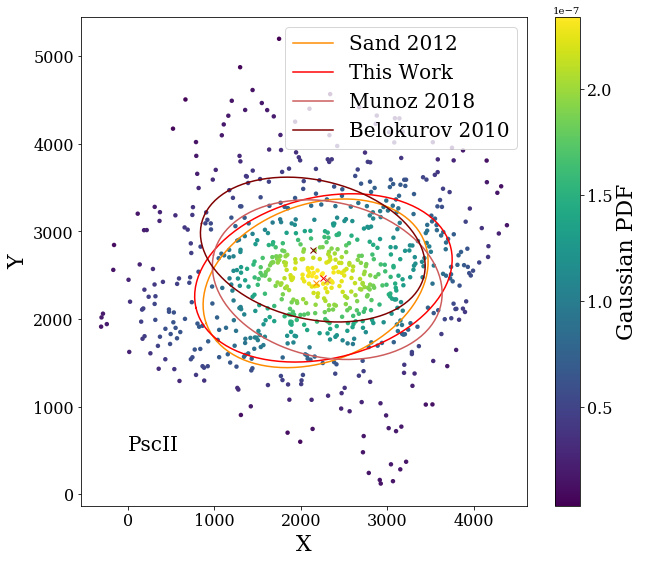

In [33]:
fig,ax=plt.subplots(figsize=(10,9))

c_plot = ax.scatter(xgood, ygood, c=z, s=20, edgecolor='')
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'darkorange',label='Sand 2012') 
plt.plot( u2+Ell_rot2[0,:] , v2+Ell_rot2[1,:],'red',label='This Work') 
plt.plot( u3+Ell_rot3[0,:] , v3+Ell_rot3[1,:],'indianred',label='Munoz 2018') 
plt.plot( u7+Ell_rot7[0,:] , v7+Ell_rot7[1,:],'maroon',label='Belokurov 2010') 
# plt.plot( u4+Ell_rot4[0,:] , v4+Ell_rot4[1,:],'darkorange',linestyle='--') 
# plt.plot( u5+Ell_rot5[0,:] , v5+Ell_rot5[1,:],'red',linestyle='--') 
# plt.plot( u6+Ell_rot6[0,:] , v6+Ell_rot6[1,:],'indianred',linestyle='--') 
plt.plot(u,v,marker='x',color='darkorange')
plt.plot(u2,v2,marker='x',color='red')
plt.plot(u3,v3,marker='x',color='indianred')
plt.plot(u7,v7,marker='x',color='maroon')
# plt.plot(u4,v4,marker='+',color='darkorange')
# plt.plot(u5,v5,marker='+',color='red')
# plt.plot(u6,v6,marker='+',color='indianred')
# ax.plot(0,0,color='red',ms=10,marker='*')

# hor_x0 = 2149
# hor_y0 = 2372
ax.legend(fontsize=20,loc=1)
ax.set_xlabel('X',fontsize=22)
ax.set_ylabel('Y',fontsize=22)
ax.tick_params(axis='both', labelsize=16)
cbar = plt.colorbar(c_plot)
cbar.set_label(r"Gaussian PDF", size=22)
cbar.ax.tick_params(labelsize=16) 

ax.text(0,500,'PscII',fontsize=20)
# plt.savefig('figures/psc2LitEll.png',bbox_inches='tight',dpi=660)
plt.show()


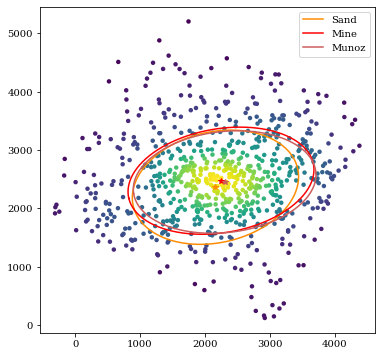

In [31]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(xgood, ygood, c=z, s=20, edgecolor='')
plt.plot( u4+Ell_rot4[0,:] , v4+Ell_rot4[1,:],'darkorange',label='Sand') 
plt.plot( u5+Ell_rot5[0,:] , v5+Ell_rot5[1,:],'red',label='Mine') 
plt.plot( u6+Ell_rot6[0,:] , v6+Ell_rot6[1,:],'indianred',label='Munoz') 
plt.plot(u4,v4,marker='*',color='darkorange')
plt.plot(u5,v5,marker='*',color='red')
plt.plot(u6,v6,marker='*',color='indianred')
# ax.plot(0,0,color='red',ms=10,marker='*')

# hor_x0 = 2149
# hor_y0 = 2372
ax.legend()
plt.show()
